In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.preprocessing import normalize

shows = pd.read_pickle("cleaned_dataset_v4.pkl")

Let's start with some rudimentary clusters that incorporated some of the simpler variables.

In [2]:
shows_no_na = shows.copy()
shows_no_na = shows_no_na[(shows_no_na['imdb_rating'].notnull())&(shows_no_na['runtime'].notnull())&(shows_no_na['imdb_votes'].notnull())]
shows_no_na.reset_index(drop=True)

,genre,link,network,status,tagline,title,years,start_year,end_year,synopsis,...,risky_3season,runtime,country,rounded_rating,rating_cat,log_imdb_votes,rounded_log_imdb_votes,imdb_votes_per_season,log_imdb_votes_per_season,rounded_log_votes_per_season
0,Comedy,http://www.ismyshowcancelled.com/show/2010/ble...,CBS,Cancelled,"A sitcom based on the Twitter feed ""S*** My Da...",$#*! My Dad Says,2010 - 2011,2010,2011.0,Ed is an opinionated and divorced 72-year-old ...,...,1,30.0,USA,6.5,low,8.443977,8.0,4647.0,8.443977,8.5
1,Drama / Crime,http://www.ismyshowcancelled.com/show/2018/100...,WGN America,Coming Soon,A thriller following an New York cop who trave...,100 Code,2018 - Present,2018,NaN,NYPD Detective Tommy Conley travels to Sweden ...,...,1,60.0,Multiple,7.5,med,7.650169,8.0,2101.0,7.650169,7.5
2,Game Show,http://www.ismyshowcancelled.com/show/2011/101...,ABC,Cancelled,A game show competition where contestants are ...,101 Ways to Leave a Gameshow,2011 - 2011,2011,2011.0,"In 101 Ways to Leave a Game Show, contestants ...",...,1,60.0,Multiple,5.5,low,3.871201,4.0,48.0,3.871201,4.0
3,Drama / Sci-fi,http://www.ismyshowcancelled.com/show/2015/12-...,Syfy,On Air,A drama following a man sent back in time to p...,12 Monkeys,2015 - Present,2015,NaN,"By the year 2043, a deadly virus has wiped out...",...,0,60.0,USA,7.5,med,10.299946,10.0,7433.0,2.574986,2.5
4,Drama,http://www.ismyshowcancelled.com/show/2017/13-...,Netflix,On Air,A drama following the revelation of why a youn...,13 Reasons Why,2017 - Present,2017,NaN,Hannah Baker is a teenage girl who takes her o...,...,0,60.0,USA,8.5,high,12.003467,12.0,81660.0,6.001733,6.0
5,Reality,http://www.ismyshowcancelled.com/show/2009/16-...,MTV,On Air,A reality series documenting the hardships of ...,16 and Pregnant,2009 - Present,2009,NaN,"""16 and Pregnant"" follows stories of various p...",...,0,60.0,USA,3.0,low,7.797702,8.0,487.0,1.559540,1.5
6,Comedy,http://www.ismyshowcancelled.com/show/2012/160...,NBC,Cancelled,A comedy following a dysfunctional family livi...,1600 Penn,2012 - 2013,2012,2013.0,The Gilchrists are a typical American family w...,...,1,30.0,USA,6.0,low,8.191740,8.0,3611.0,8.191740,8.0
7,Comedy,http://www.ismyshowcancelled.com/show/2010/18-...,CBC,Cancelled,A Canadian comedy series about a modern-day Ro...,18 to Life,2010 - 2011,2010,2011.0,Tom and Jessie are 18-year-old next-door neigh...,...,0,30.0,Canada,7.0,med,6.572283,7.0,357.5,3.286141,3.5
8,Reality,http://www.ismyshowcancelled.com/show/2008/19-...,TLC,Cancelled,A reality series following the Duggar family.,19 Kids and Counting,2008 - 2015,2008,2015.0,Cameras in this reality series follow Jim Bob ...,...,0,30.0,USA,3.5,low,7.725771,8.0,283.0,0.965721,1.0
9,Comedy,http://www.ismyshowcancelled.com/show/2011/2-b...,CBS,Cancelled,A comedy following the lives of two waitresses...,2 Broke Girls,2011 - 2017,2011,2017.0,Max is a twenty-something girl who comes from ...,...,1,30.0,USA,6.5,med,11.301105,11.0,13485.0,1.883518,2.0


In [3]:
kmeans = cluster.MiniBatchKMeans(n_clusters=5)

cluster_num_cols = ['imdb_rating','imdb_votes','runtime']
cluster_nums = pd.DataFrame(normalize(shows_no_na[cluster_num_cols],axis=0),columns=cluster_num_cols).reset_index(drop=True)
cluster_cats = pd.get_dummies(shows_no_na[['network_type','primary_genre']].apply(lambda x: x.astype('O'))).reset_index(drop=True)

total_cluster_cols = pd.concat([cluster_cats,cluster_nums],axis=1)

clusts = kmeans.fit_predict(total_cluster_cols)

And now charting them along a few different dimensions...

Cluster 0


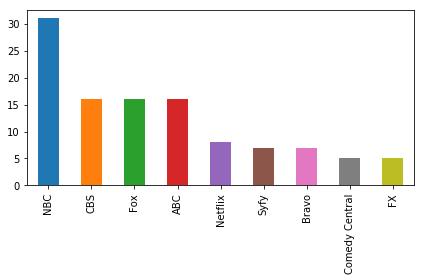

Cluster 1


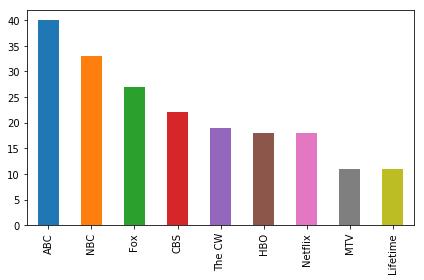

Cluster 2


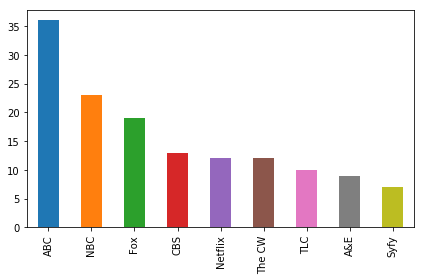

Cluster 3


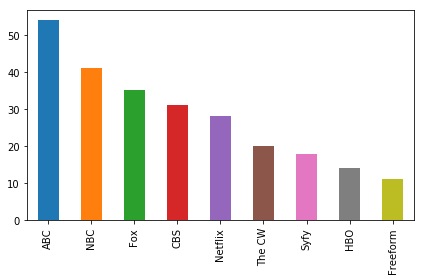

Cluster 4


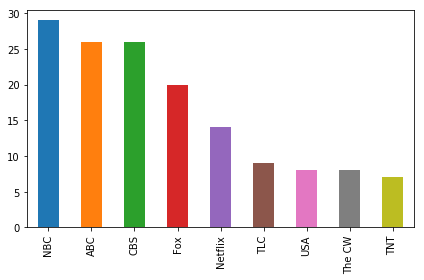

In [4]:
total_cluster_cols['network'] = shows_no_na['network']
total_cluster_cols['clust'] = clusts

for clust in sorted(total_cluster_cols['clust'].unique()):
  
    print('Cluster {}'.format(clust))
    total_cluster_cols[total_cluster_cols['clust'] == clust]['network'].value_counts()[0:9].plot(kind='bar')
    plt.tight_layout()
    plt.show()

In [5]:
total_cluster_cols['rounded_rating'] = shows['rounded_rating']

In [6]:
total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_rating'].value_counts().sort_index().values

array([ 6, 10,  5,  8, 13, 16, 43, 46, 53, 36, 28,  4,  1], dtype=int64)

In [7]:
plt.bar(total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_rating'].value_counts().sort_index().index,\
       total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_rating'].value_counts().sort_index().values,\
       align='edge')

<Container object of 13 artists>

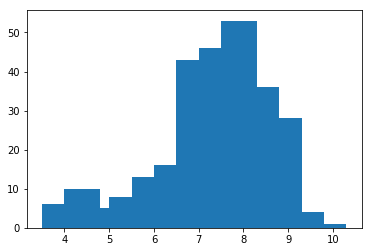

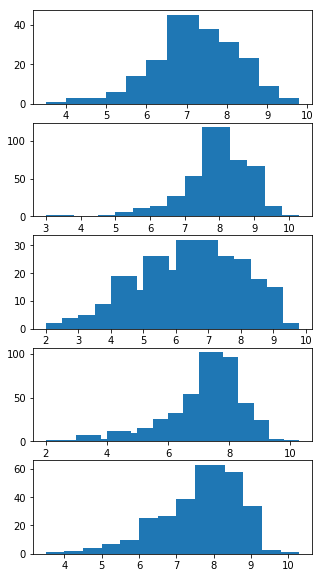

In [8]:
total_cluster_cols['rounded_rating'] = shows_no_na['rounded_rating'].reset_index(drop=True)
fig = plt.figure(figsize=(5,10))
num = 1

for clust in sorted(total_cluster_cols['clust'].unique()):
    
    ax = fig.add_subplot(5,1,num)
    ax.bar(total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_rating'].value_counts().sort_index().index,\
                   total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_rating'].value_counts().sort_index().values,\
                   align='edge',alpha=1)

    num+=1
    
plt.show()

Displaying this a slightly different way...

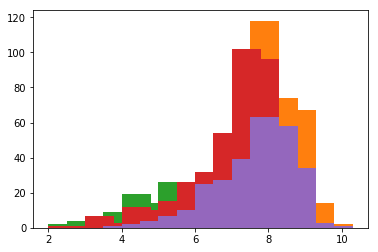

In [9]:
for clust in sorted(total_cluster_cols['clust'].unique()):
    
    plt.bar(total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_rating'].value_counts().sort_index().index,\
                   total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_rating'].value_counts().sort_index().values,\
                   align='edge',alpha=1)
    
plt.show()

Now looking at IMDB votes in the same ways...

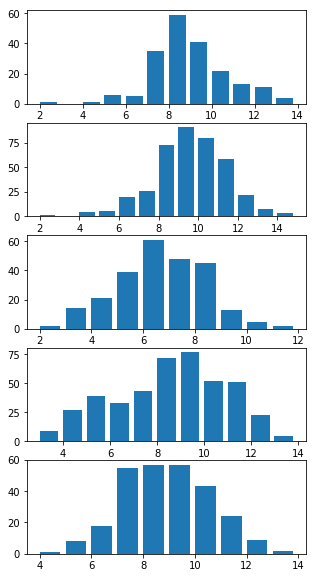

In [10]:
total_cluster_cols['rounded_log_votes'] = shows_no_na['rounded_log_imdb_votes'].reset_index(drop=True)

fig = plt.figure(figsize=(5,10))
num = 1

for clust in sorted(total_cluster_cols['clust'].unique()):
    
    ax = fig.add_subplot(5,1,num)
    ax.bar(total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_log_votes'].value_counts().sort_index().index,\
                   total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_log_votes'].value_counts().sort_index().values,\
                   align='edge',alpha=1)

    num+=1
    
plt.show()

Displaying a different way...

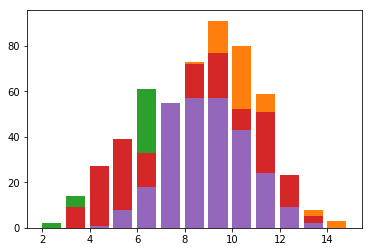

In [11]:
for clust in sorted(total_cluster_cols['clust'].unique()):
    
    plt.bar(total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_log_votes'].value_counts().sort_index().index,\
                   total_cluster_cols[total_cluster_cols['clust'] == clust]['rounded_log_votes'].value_counts().sort_index().values,\
                   align='edge',alpha=1)
    
plt.show()

In [12]:
pd.crosstab(clusts,shows_no_na['two_season_cancel'])

two_season_cancel,0,1
row_0,,
0,72,126
1,274,119
2,193,57
3,196,235
4,198,76


The final chart is not very informative, but the general point is that there's a lot of overlap between segments without any obvious differentiators. Aside from the fact that one cluster has pretty low ratings and features a lot of broadcast networks and basic cable underperformers like SyFy/A&E, it's hard to tell which variables are contributing most to the clustering. Let's use PCA to reduce dimensionality to two components and see if we can infer anything else about the degree of overlap/separation between clusters.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_clust = pd.DataFrame(pca.fit_transform(total_cluster_cols.drop(['clust','network'],axis=1)))

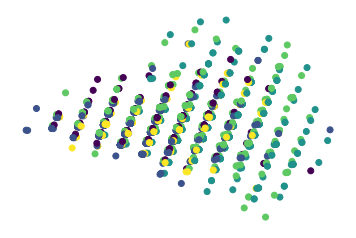

In [14]:
ax = plt.subplot(111)
ax.scatter(pca_clust.iloc[:,0],pca_clust.iloc[:,1],c=total_cluster_cols['clust'])
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.savefig("Extras/Kmeanscluster.png")
#plt.frameon=False
plt.show()

Although this is just along two of many more possible components/dimensions, the point stands: these shows don't seem to cluster that neatly, and there's a LOT of overlap. Let's see if an algorithm like mean-shift, which is known to adapt better to large, unknown numbers of clusters.

In [15]:
total_cluster_cols.to_pickle("Extras/5k_clusters.pkl")

In [16]:
total_cluster_cols = total_cluster_cols.drop(['network','clust'],axis=1)

In [17]:
# Mean shift clustering

# Bandwidth estimation is causing too few clusters
#bandwidth = cluster.estimate_bandwidth(total_cluster_cols, quantile=0.2, n_samples=500)

ms = cluster.MeanShift(bandwidth=1, bin_seeding=True)

ms.fit(total_cluster_cols)
clusts = ms.labels_
total_cluster_cols['clust'] = clusts 
pd.crosstab(clusts,shows_no_na['network_type'])

network_type,basic_cable,broadcast,premium_cable,streaming
row_0,,,,
0,0,56,0,0
1,0,57,0,0
2,63,0,0,0
3,51,0,0,0
4,0,49,0,0
5,45,0,0,0
6,0,46,0,0
7,0,49,0,0
8,0,40,0,0


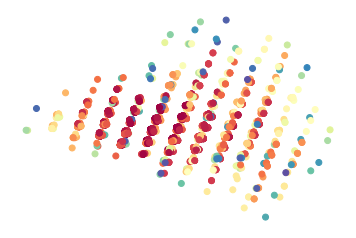

In [18]:
pca_clust = pd.DataFrame(pca.fit_transform(total_cluster_cols.drop(['clust'],axis=1)))
ax = plt.subplot(111)
ax.scatter(pca_clust.iloc[:,0],pca_clust.iloc[:,1],c=total_cluster_cols['clust'],cmap='Spectral')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.savefig("Extras/meanshiftcluster.png")
#ax = plt.scatter(pca_clust.iloc[:,0],pca_clust.iloc[:,1],c=total_cluster_cols['clust'],cmap='Spectral')
#plt.fr
plt.show()

In [95]:
total_cluster_cols['clust'].value_counts()

0     408
1     288
2     247
3     122
4      75
7      58
6      48
8      45
5      42
10     31
11     25
12     25
9      24
17     24
16     23
13     21
14     21
15     19
Name: clust, dtype: int64

In [98]:
pca.explained_variance_ratio_

array([0.71287846, 0.12988232])

In [99]:
total_cluster_cols.to_pickle("meanshift_clusters.pkl")

As you can see, there's a lot of imbalance  and overlap between the class sizes (which again depends on the bandwidth chosen), even though we're explaining over 80% of the variance with these two components. In other words, it's difficult to neatly separate these shows into different groups! This will be something we have to keep in mind when we run the supervised models.